## Flow of the Webinar:
1. Get data from [Understat](https://understat.com/) for Messi and Ronaldo
3. Data Cleaning and EDA
3. Comparative Analysis
3. Shot Analysis
2. Distance Analysis
3. The Final comparison

In [1]:
# Import required libraries:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
# Import plotting libraries:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get that Data!

## Cristiano Ronaldo

### Season-wise data

In [3]:
# Scrape Cristiano player stats:
cris_scrape_url = "https://understat.com/player/2371"
page_connect = urlopen(cris_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
cris_season_wise_meta_df.insert(0, "Player", "Cristiano")

In [4]:
cris_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,3,3,17,270,3.4421220794320107,0,0.04025531746447086,2,2021,Manchester United,0,0,3,3.4421220794320107,3.6202487349510193,0.2576743755489588
1,Cristiano,Sub,1,0,1,28,0.20496894419193268,0,0.03537696972489357,1,2021,Juventus,1,0,0,0.20496894419193268,0.051310088485479355,0.015933118760585785
2,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
3,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
4,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
5,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
6,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
7,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
8,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485


### Shots Data

In [5]:
# Scrape Cristiano shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_shots_df = pd.json_normalize(json.loads(json_data))
cris_shots_df.insert(0, "Player", "Cristiano")

In [6]:
cris_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,Cristiano,431761,46,SavedShot,0.8919999694824219,0.5629999923706055,0.3898105323314667,Cristiano Ronaldo,a,2371,OpenPlay,2021,RightFoot,16424,West Ham,Manchester United,1,2,2021-09-19 13:00:00,Bruno Fernandes,Pass
1356,Cristiano,433133,10,MissedShots,0.7140000152587891,0.6179999923706054,0.014389225281774998,Cristiano Ronaldo,h,2371,OpenPlay,2021,RightFoot,16431,Manchester United,Aston Villa,0,1,2021-09-25 11:30:00,Bruno Fernandes,Pass
1357,Cristiano,433141,24,BlockedShot,0.8780000305175781,0.7630000305175781,0.02616853453218937,Cristiano Ronaldo,h,2371,OpenPlay,2021,RightFoot,16431,Manchester United,Aston Villa,0,1,2021-09-25 11:30:00,Luke Shaw,TakeOn
1358,Cristiano,433147,45,BlockedShot,0.7609999847412109,0.6580000305175782,0.05522877722978592,Cristiano Ronaldo,h,2371,DirectFreekick,2021,RightFoot,16431,Manchester United,Aston Villa,0,1,2021-09-25 11:30:00,None,Standard


In [7]:
cris_shots_df.shape

(1360, 21)

### Messi

### Season-wise data

In [8]:
# Scrape Messi player stats:
messi_scrape_url = "https://understat.com/player/2097"
page_connect = urlopen(messi_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
messi_season_wise_meta_df.insert(0, "Player", "Messi")

In [9]:
messi_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,Sub,2,0,4,102,0.5057340860366821,0,0.10285051167011261,2,2021,Paris Saint Germain,0,0,0,0.5057340860366821,0.5783023834228516,0.05743229761719704
1,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084
2,Messi,Sub,33,25,159,2876,20.84966728463769,20,16.593363385647535,88,2019,Barcelona,4,0,20,17.133279267698526,34.92346678301692,13.53765751607716
3,Messi,FW,34,36,170,2704,25.997169069945812,13,15.33516551926732,93,2018,Barcelona,3,0,32,22.28090887516737,38.45987746119499,10.69879900291562
4,Messi,FW,36,34,196,2995,28.946280613541603,12,15.100405622273684,87,2017,Barcelona,3,0,32,25.973170146346092,48.18063422292471,21.634404016658664
5,Messi,FWR,34,37,179,2832,26.885174363851547,9,13.955131396651268,79,2016,Barcelona,6,0,31,21.682230830192566,42.52504535019398,18.13351222872734
6,Messi,FWR,33,26,158,2726,27.101910315454006,16,15.871278138831258,77,2015,Barcelona,3,0,23,21.899351350963116,41.99686624109745,15.196364373899996
7,Messi,FW,38,43,187,3374,35.89176357910037,18,17.61195552162826,95,2014,Barcelona,4,0,38,31.432097773998976,54.75360991060734,19.75672373920679


### Shots Data

In [10]:
# Scrape Messi shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_shots_df = pd.json_normalize(json.loads(json_data))
messi_shots_df.insert(0, "Player", "Messi")

In [11]:
messi_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Messi,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,Messi,32525,41,Goal,0.8619999694824219,0.615,0.06870150566101074,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,Messi,32529,62,Goal,0.86,0.435,0.15034306049346924,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,Messi,32769,3,SavedShot,0.8180000305175781,0.38,0.045503295958042145,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,Messi,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531666964292526,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,Messi,422618,92,MissedShots,0.8040000152587891,0.535,0.04337277263402939,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Miralem Pjanic,TakeOn
1244,Messi,432204,16,SavedShot,0.7959999847412109,0.6140000152587891,0.02882419154047966,Lionel Messi,h,2097,OpenPlay,2021,LeftFoot,17879,Paris Saint Germain,Lyon,2,1,2021-09-19 18:45:00,Kylian Mbappe-Lottin,Pass
1245,Messi,432208,31,SavedShot,0.924000015258789,0.6020000076293945,0.4010329246520996,Lionel Messi,h,2097,OpenPlay,2021,LeftFoot,17879,Paris Saint Germain,Lyon,2,1,2021-09-19 18:45:00,Neymar,Pass
1246,Messi,432209,36,ShotOnPost,0.7380000305175781,0.5220000076293946,0.058890312910079956,Lionel Messi,h,2097,DirectFreekick,2021,LeftFoot,17879,Paris Saint Germain,Lyon,2,1,2021-09-19 18:45:00,None,Standard


## Build Final Season-level and shots data

In [12]:
cris_season_wise_meta_df.drop(index=[0])

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
1,Cristiano,Sub,1,0,1,28,0.20496894419193268,0,0.03537696972489357,1,2021,Juventus,1,0,0,0.20496894419193268,0.051310088485479355,0.015933118760585785
2,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
3,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
4,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
5,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
6,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
7,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
8,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485


In [13]:
cris_season_wise_meta_df.reset_index(drop=True, inplace=True)

### Joint Season-wise Data

In [14]:
season_wise_meta_df = cris_season_wise_meta_df.append(messi_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,3,3,17,270,3.4421220794320107,0,0.04025531746447086,2,2021,Manchester United,0,0,3,3.4421220794320107,3.6202487349510193,0.2576743755489588
1,Cristiano,Sub,1,0,1,28,0.20496894419193268,0,0.03537696972489357,1,2021,Juventus,1,0,0,0.20496894419193268,0.051310088485479355,0.015933118760585785
2,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
3,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
4,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
5,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
6,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
7,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
8,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485
0,Messi,Sub,2,0,4,102,0.5057340860366821,0,0.10285051167011261,2,2021,Paris Saint Germain,0,0,0,0.5057340860366821,0.5783023834228516,0.05743229761719704


### Joint Shots Data

In [15]:
cris_shots_df.tail()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
1355,Cristiano,431761,46,SavedShot,0.8919999694824219,0.5629999923706055,0.3898105323314667,Cristiano Ronaldo,a,2371,OpenPlay,2021,RightFoot,16424,West Ham,Manchester United,1,2,2021-09-19 13:00:00,Bruno Fernandes,Pass
1356,Cristiano,433133,10,MissedShots,0.7140000152587891,0.6179999923706054,0.014389225281774998,Cristiano Ronaldo,h,2371,OpenPlay,2021,RightFoot,16431,Manchester United,Aston Villa,0,1,2021-09-25 11:30:00,Bruno Fernandes,Pass
1357,Cristiano,433141,24,BlockedShot,0.8780000305175781,0.7630000305175781,0.02616853453218937,Cristiano Ronaldo,h,2371,OpenPlay,2021,RightFoot,16431,Manchester United,Aston Villa,0,1,2021-09-25 11:30:00,Luke Shaw,TakeOn
1358,Cristiano,433147,45,BlockedShot,0.7609999847412109,0.6580000305175782,0.05522877722978592,Cristiano Ronaldo,h,2371,DirectFreekick,2021,RightFoot,16431,Manchester United,Aston Villa,0,1,2021-09-25 11:30:00,None,Standard
1359,Cristiano,433153,69,BlockedShot,0.8169999694824219,0.30100000381469727,0.0290842168033123,Cristiano Ronaldo,h,2371,OpenPlay,2021,RightFoot,16431,Manchester United,Aston Villa,0,1,2021-09-25 11:30:00,Mason Greenwood,Pass


In [16]:
cris_shots_df.drop(index=[1342])

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,Cristiano,431761,46,SavedShot,0.8919999694824219,0.5629999923706055,0.3898105323314667,Cristiano Ronaldo,a,2371,OpenPlay,2021,RightFoot,16424,West Ham,Manchester United,1,2,2021-09-19 13:00:00,Bruno Fernandes,Pass
1356,Cristiano,433133,10,MissedShots,0.7140000152587891,0.6179999923706054,0.014389225281774998,Cristiano Ronaldo,h,2371,OpenPlay,2021,RightFoot,16431,Manchester United,Aston Villa,0,1,2021-09-25 11:30:00,Bruno Fernandes,Pass
1357,Cristiano,433141,24,BlockedShot,0.8780000305175781,0.7630000305175781,0.02616853453218937,Cristiano Ronaldo,h,2371,OpenPlay,2021,RightFoot,16431,Manchester United,Aston Villa,0,1,2021-09-25 11:30:00,Luke Shaw,TakeOn
1358,Cristiano,433147,45,BlockedShot,0.7609999847412109,0.6580000305175782,0.05522877722978592,Cristiano Ronaldo,h,2371,DirectFreekick,2021,RightFoot,16431,Manchester United,Aston Villa,0,1,2021-09-25 11:30:00,None,Standard


In [17]:
cris_shots_df.drop(index=[1342], inplace=True)

In [18]:
shots_df = cris_shots_df.append(messi_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,Messi,422618,92,MissedShots,0.8040000152587891,0.535,0.04337277263402939,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Miralem Pjanic,TakeOn
1244,Messi,432204,16,SavedShot,0.7959999847412109,0.6140000152587891,0.02882419154047966,Lionel Messi,h,2097,OpenPlay,2021,LeftFoot,17879,Paris Saint Germain,Lyon,2,1,2021-09-19 18:45:00,Kylian Mbappe-Lottin,Pass
1245,Messi,432208,31,SavedShot,0.924000015258789,0.6020000076293945,0.4010329246520996,Lionel Messi,h,2097,OpenPlay,2021,LeftFoot,17879,Paris Saint Germain,Lyon,2,1,2021-09-19 18:45:00,Neymar,Pass
1246,Messi,432209,36,ShotOnPost,0.7380000305175781,0.5220000076293946,0.058890312910079956,Lionel Messi,h,2097,DirectFreekick,2021,LeftFoot,17879,Paris Saint Germain,Lyon,2,1,2021-09-19 18:45:00,None,Standard


# Data Cleaning and EDA

## On Season-wise data

In [19]:
season_wise_meta_df.describe(include="all")

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
count,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
unique,2,5,11,14,17,17,17,12,17,14,8,5,6,2,11,17,17,17
top,Cristiano,FW,33,25,167,28,26.885174363851547,0,15.100405622273684,77,2021,Barcelona,3,0,23,3.4421220794320107,3.6202487349510193,18.13351222872734
freq,9,8,4,2,1,1,1,3,1,2,3,7,7,16,3,1,1,1


In [20]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 7
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      17 non-null     object
 1   position    17 non-null     object
 2   games       17 non-null     object
 3   goals       17 non-null     object
 4   shots       17 non-null     object
 5   time        17 non-null     object
 6   xG          17 non-null     object
 7   assists     17 non-null     object
 8   xA          17 non-null     object
 9   key_passes  17 non-null     object
 10  season      17 non-null     object
 11  team        17 non-null     object
 12  yellow      17 non-null     object
 13  red         17 non-null     object
 14  npg         17 non-null     object
 15  npxG        17 non-null     object
 16  xGChain     17 non-null     object
 17  xGBuildup   17 non-null     object
dtypes: object(18)
memory usage: 2.5+ KB


In [21]:
season_wise_meta_df["goals"].sum()

'3029312126253548030253634372643'

In [22]:
season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,3,3,17,270,3.442122,0,0.040255,2,2021,Manchester United,0,0,3,3.442122,3.620249,0.257674
1,Cristiano,Sub,1,0,1,28,0.204969,0,0.035377,1,2021,Juventus,1,0,0,0.204969,0.051310,0.015933
2,Cristiano,FW,33,29,167,2807,29.838081,3,3.854639,36,2020,Juventus,3,0,23,23.747810,28.635406,8.915718
3,Cristiano,FWL,33,31,208,2920,29.431679,5,6.067226,51,2019,Juventus,3,0,19,19.534956,26.553609,7.224642
4,Cristiano,FW,31,21,175,2692,23.324040,8,5.193874,48,2018,Juventus,3,0,16,18.756287,21.854170,7.177339
5,Cristiano,FW,27,26,178,2304,26.999304,5,5.524842,40,2017,Real Madrid,1,0,23,24.026193,31.623837,9.471853
6,Cristiano,FWL,29,25,162,2546,25.413738,6,4.591036,31,2016,Real Madrid,4,0,19,19.467645,29.574578,8.661095
7,Cristiano,AML,36,35,227,3186,35.589006,11,8.606404,51,2015,Real Madrid,3,0,29,28.899508,40.818028,9.863005
8,Cristiano,FWL,35,48,225,3103,39.308761,16,13.600642,76,2014,Real Madrid,5,1,38,30.389686,43.608020,7.520237
0,Messi,Sub,2,0,4,102,0.505734,0,0.102851,2,2021,Paris Saint Germain,0,0,0,0.505734,0.578302,0.057432


In [23]:

season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [24]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 7
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      17 non-null     object 
 1   position    17 non-null     object 
 2   games       17 non-null     int64  
 3   goals       17 non-null     int64  
 4   shots       17 non-null     int64  
 5   time        17 non-null     int64  
 6   xG          17 non-null     float64
 7   assists     17 non-null     int64  
 8   xA          17 non-null     float64
 9   key_passes  17 non-null     int64  
 10  season      17 non-null     int64  
 11  team        17 non-null     object 
 12  yellow      17 non-null     int64  
 13  red         17 non-null     int64  
 14  npg         17 non-null     int64  
 15  npxG        17 non-null     float64
 16  xGChain     17 non-null     float64
 17  xGBuildup   17 non-null     float64
dtypes: float64(5), int64(10), object(3)
memory usage: 2.5+ KB


In [25]:
season_wise_meta_df["goals"].sum()

449

In [26]:
type(season_wise_meta_df["goals"].sum())

numpy.int64

In [27]:
season_wise_meta_df = season_wise_meta_df.round(2)

In [28]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,3,3,17,270,3.44,0,0.04,2,2021,Manchester United,0,0,3,3.44,3.62,0.26
1,Cristiano,Sub,1,0,1,28,0.20,0,0.04,1,2021,Juventus,1,0,0,0.20,0.05,0.02
2,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92
3,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22
4,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18
5,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47
6,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66
7,Cristiano,AML,36,35,227,3186,35.59,11,8.61,51,2015,Real Madrid,3,0,29,28.90,40.82,9.86
8,Cristiano,FWL,35,48,225,3103,39.31,16,13.60,76,2014,Real Madrid,5,1,38,30.39,43.61,7.52
0,Messi,Sub,2,0,4,102,0.51,0,0.10,2,2021,Paris Saint Germain,0,0,0,0.51,0.58,0.06


In [29]:
season_wise_meta_df.describe(percentiles=[]).round(1)

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
count,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
mean,27.8,26.4,153.4,2381.3,23.9,8.9,9.0,54.9,2017.7,2.9,0.1,21.9,19.5,30.9,10.5
std,12.6,13.9,72.7,1101.1,11.7,6.4,6.3,32.5,2.4,1.6,0.2,11.9,9.5,16.3,6.9
min,1.0,0.0,1.0,28.0,0.2,0.0,0.0,1.0,2014.0,0.0,0.0,0.0,0.2,0.0,0.0
50%,33.0,29.0,175.0,2807.0,26.9,9.0,8.6,51.0,2018.0,3.0,0.0,23.0,21.9,34.9,9.5
max,38.0,48.0,227.0,3374.0,39.3,20.0,17.6,95.0,2021.0,6.0,1.0,38.0,31.4,54.8,21.6


In [30]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard


In [31]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,3,3,17,270,3.44,0,0.04,2,2021,Manchester United,0,0,3,3.44,3.62,0.26
1,Cristiano,Sub,1,0,1,28,0.20,0,0.04,1,2021,Juventus,1,0,0,0.20,0.05,0.02
2,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92
3,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22
4,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18
5,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47
6,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66
7,Cristiano,AML,36,35,227,3186,35.59,11,8.61,51,2015,Real Madrid,3,0,29,28.90,40.82,9.86
8,Cristiano,FWL,35,48,225,3103,39.31,16,13.60,76,2014,Real Madrid,5,1,38,30.39,43.61,7.52
0,Messi,Sub,2,0,4,102,0.51,0,0.10,2,2021,Paris Saint Germain,0,0,0,0.51,0.58,0.06


In [32]:
pd.set_option("display.max_rows", 120)

In [33]:
season_wise_meta_df.groupby(["Player"]).describe(percentiles=[]).T.round(1)

Player            Cristiano   Messi
games      count        9.0     8.0
           mean        25.3    30.6
           std         13.5    11.7
           min          1.0     2.0
           50%         31.0    34.0
           max         36.0    38.0
goals      count        9.0     8.0
           mean        24.2    28.9
           std         15.0    13.1
           min          0.0     0.0
           50%         26.0    32.0
           max         48.0    43.0
shots      count        9.0     8.0
           mean       151.1   156.0
           std         84.1    63.2
           min          1.0     4.0
           50%        175.0   174.5
           max        227.0   196.0
time       count        9.0     8.0
           mean      2206.2  2578.2
           std       1198.4  1022.7
           min         28.0   102.0
           50%       2692.0  2854.0
           max       3186.0  3374.0
xG         count        9.0     8.0
           mean        23.7    24.1
           std         13.4    10.4
           min          0.2     0.5
           50%         27.0    26.8
           max         39.3    35.9
assists    count        9.0     8.0
           mean         6.0    12.1
           std          5.1     6.3
           min          0.0     0.0
           50%          5.0    12.5
           max         16.0    20.0
xA         count        9.0     8.0
           mean         5.3    13.2
           std          4.2     5.6
           min          0.0     0.1
           50%          5.2    15.2
           max         13.6    17.6
key_passes count        9.0     8.0
           mean        37.3    74.8
           std         24.0    30.2
           min          1.0     2.0
           50%         40.0    83.0
           max         76.0    95.0
season     count        9.0     8.0
           mean      2017.9  2017.5
           std          2.6     2.4
           min       2014.0  2014.0
           50%       2018.0  2017.5
           max       2021.0  2021.0
yellow     count        9.0     8.0
           mean         2.6     3.4
           std          1.6     1.7
           min          0.0     0.0
           50%          3.0     3.5
           max          5.0     6.0
red        count        9.0     8.0
           mean         0.1     0.0
           std          0.3     0.0
           min          0.0     0.0
           50%          0.0     0.0
           max          1.0     0.0
npg        count        9.0     8.0
           mean        18.9    25.4
           std         11.8    11.7
           min          0.0     0.0
           50%         19.0    29.0
           max         38.0    38.0
npxG       count        9.0     8.0
           mean        18.7    20.5
           std         10.4     9.0
           min          0.2     0.5
           50%         19.5    22.1
           max         30.4    31.4
xGChain    count        9.0     8.0
           mean        25.1    37.4
           std         14.9    16.2
           min          0.0     0.6
           50%         28.6    40.2
           max         43.6    54.8
xGBuildup  count        9.0     8.0
           mean         6.6    14.9
           std          3.8     7.1
           min          0.0     0.1
           50%          7.5    16.7
           max          9.9    21.6

## On Shots data

In [34]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 1247
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           2607 non-null   object
 1   id               2607 non-null   object
 2   minute           2607 non-null   object
 3   result           2607 non-null   object
 4   X                2607 non-null   object
 5   Y                2607 non-null   object
 6   xG               2607 non-null   object
 7   player           2607 non-null   object
 8   h_a              2607 non-null   object
 9   player_id        2607 non-null   object
 10  situation        2607 non-null   object
 11  season           2607 non-null   object
 12  shotType         2607 non-null   object
 13  match_id         2607 non-null   object
 14  h_team           2607 non-null   object
 15  a_team           2607 non-null   object
 16  h_goals          2607 non-null   object
 17  a_goals          2607 non-null   

In [35]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

In [36]:
shots_df = shots_df.round(2)

In [37]:
shots_df.describe(percentiles=[]).round(1)

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0
mean,207316.9,48.2,0.8,0.5,0.2,2239.8,2017.0,8086.3,2.1,1.5
std,128548.2,26.2,0.1,0.1,0.2,136.9,2.1,4642.0,1.8,1.5
min,32522.0,0.0,0.5,0.0,0.0,2097.0,2014.0,1404.0,0.0,0.0
50%,184513.0,48.0,0.9,0.5,0.1,2371.0,2017.0,8038.0,2.0,1.0
max,433153.0,96.0,1.0,0.9,1.0,2371.0,2021.0,17879.0,10.0,8.0


In [38]:
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.84,0.50,0.07,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.77,0.62,0.03,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.71,0.67,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.82,0.24,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.88,0.50,0.74,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,Messi,422618,92,MissedShots,0.80,0.54,0.04,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Miralem Pjanic,TakeOn
1244,Messi,432204,16,SavedShot,0.80,0.61,0.03,Lionel Messi,h,2097,OpenPlay,2021,LeftFoot,17879,Paris Saint Germain,Lyon,2,1,2021-09-19 18:45:00,Kylian Mbappe-Lottin,Pass
1245,Messi,432208,31,SavedShot,0.92,0.60,0.40,Lionel Messi,h,2097,OpenPlay,2021,LeftFoot,17879,Paris Saint Germain,Lyon,2,1,2021-09-19 18:45:00,Neymar,Pass
1246,Messi,432209,36,ShotOnPost,0.74,0.52,0.06,Lionel Messi,h,2097,DirectFreekick,2021,LeftFoot,17879,Paris Saint Germain,Lyon,2,1,2021-09-19 18:45:00,None,Standard


# Comparative Analysis

## On Season-wise Data

In [39]:
season_wise_meta_df.select_dtypes(exclude=[object]).columns

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [40]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

In [41]:
num_cols

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [42]:
num_cols.__len__()

15

In [43]:
len(num_cols)

15

In [44]:
season_wise_meta_df.groupby(["Player"])[num_cols].sum()

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
Player,,,,,,,,,,,,,,,
Cristiano,228,218,1360,19856,213.54,54,47.51,336,18161,23,1,170,168.47,226.33,59.11
Messi,245,231,1248,20626,192.87,97,105.99,598,16140,27,0,203,163.86,299.33,119.36


In [45]:
season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,228,218,1360,19856,213.54,54,47.51,336,18161,23,1,170,168.47,226.33,59.11
1,Messi,245,231,1248,20626,192.87,97,105.99,598,16140,27,0,203,163.86,299.33,119.36


In [46]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

In [47]:
total_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,228,218,1360,19856,213.5,54,47.5,336,18161,23,1,170,168.5,226.3,59.1
1,Messi,245,231,1248,20626,192.9,97,106.0,598,16140,27,0,203,163.9,299.3,119.4


### CA on Totals (Consolidated data for all seasons per player)

In [48]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800)
fig.show()

NOTE: On xGChain and xGBuildup \\
xGChain --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **INCLUDING** the final pass or the shot. \\
xGBuildup --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **EXCLUDING** the final pass or the shot. \\

### Feature Engineering

In [49]:
season_wise_meta_df.columns

Index(['Player', 'position', 'games', 'goals', 'shots', 'time', 'xG',
       'assists', 'xA', 'key_passes', 'season', 'team', 'yellow', 'red', 'npg',
       'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [50]:
season_wise_meta_df["xGDiff"] = season_wise_meta_df["goals"].sub(season_wise_meta_df["xG"]).round(2)

season_wise_meta_df["goal_contrib"] = season_wise_meta_df["goals"].add(season_wise_meta_df["assists"]).round(1)

season_wise_meta_df["xgoal_contrib"] = season_wise_meta_df["xG"].add(season_wise_meta_df["xA"]).round(1)

season_wise_meta_df["shot_contrib"] = season_wise_meta_df[["shots", "key_passes", "assists"]].sum(axis=1).round(1)

In [51]:
num_cols = num_cols.tolist() + ["xGDiff", "goal_contrib", "xgoal_contrib", "shot_contrib"]

In [52]:
num_cols

['games',
 'goals',
 'shots',
 'time',
 'xG',
 'assists',
 'xA',
 'key_passes',
 'season',
 'yellow',
 'red',
 'npg',
 'npxG',
 'xGChain',
 'xGBuildup',
 'xGDiff',
 'goal_contrib',
 'xgoal_contrib',
 'shot_contrib']

In [53]:
num_cols = [col for col in num_cols if col not in ["season", "yellow", "red", "games"]]

In [54]:
num_cols

['goals',
 'shots',
 'time',
 'xG',
 'assists',
 'xA',
 'key_passes',
 'npg',
 'npxG',
 'xGChain',
 'xGBuildup',
 'xGDiff',
 'goal_contrib',
 'xgoal_contrib',
 'shot_contrib']

In [55]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

In [56]:
num_cols.__len__()

15

### CA on Totals - Updated

In [57]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800)
fig.show()

### Per 90 Stats

In [58]:
for col in num_cols:
    total_df[col + "_p90"] = total_df[col].divide(total_df["time"]).multiply(90).round(2)

In [59]:
per_90_cols = [col + "_p90" for col in num_cols if col != "time"]

In [60]:
len(per_90_cols)

14

### CA on Totals - Updated

In [61]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=per_90_cols)
# Add bar plot for goals conceded in all subplots:
for col in per_90_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800)
fig.show()

### CA on Season-wise stats (Consolidated data per season per player)

In [62]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    cris_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Cristiano"]
    fig.add_trace(go.Bar(x=cris_plot_data["season"],
                         y=cris_plot_data[col],
                         text=cris_plot_data[col],
                         textposition="inside",
                         name=col + "(Cris)"),
                row=i, col=j)
    messi_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Messi"]
    fig.add_trace(go.Bar(x=messi_plot_data["season"],
                        y=messi_plot_data[col],
                        text=messi_plot_data[col],
                        textposition="inside",
                        name=col + "(Messi)"),
            row=i, col=j)

    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800, barmode="stack")
fig.show()

### Per 90 Stats (Season-wise)

In [63]:
for col in num_cols:
    season_wise_meta_df[col + "_p90"] = season_wise_meta_df[col].divide(season_wise_meta_df["time"]).multiply(90).round(2)

In [64]:
per_90_cols = [col + "_p90" for col in num_cols if col != "time"]

In [65]:
len(per_90_cols)

14

In [66]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=per_90_cols)
# Add bar plot for goals conceded in all subplots:
for col in per_90_cols:
    cris_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Cristiano"]
    fig.add_trace(go.Bar(x=cris_plot_data["season"],
                         y=cris_plot_data[col],
                         text=cris_plot_data[col],
                         textposition="inside",
                         name=col + "(Cris)"),
                row=i, col=j)
    messi_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Messi"]
    fig.add_trace(go.Bar(x=messi_plot_data["season"],
                        y=messi_plot_data[col],
                        text=messi_plot_data[col],
                        textposition="inside",
                        name=col + "(Messi)"),
            row=i, col=j)

    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800, barmode="stack")
fig.show()

## On Shots Data

#### CA on Totals

In [67]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.84,0.50,0.07,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.77,0.62,0.03,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.71,0.67,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.82,0.24,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.88,0.50,0.74,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard


In [68]:
shots_df["result"].unique()

array(['SavedShot', 'BlockedShot', 'Goal', 'MissedShots', 'ShotOnPost'],
      dtype=object)

In [69]:
shots_df.columns

Index(['Player', 'id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a',
       'player_id', 'situation', 'season', 'shotType', 'match_id', 'h_team',
       'a_team', 'h_goals', 'a_goals', 'date', 'player_assisted',
       'lastAction'],
      dtype='object')

In [70]:
shot_cols = ["result", "situation", "shotType"]

In [71]:
plot_df = shots_df.groupby(["Player", "result"]).agg({"result": "count"})

In [72]:
plot_df.name = "total"

In [73]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=1, cols=3,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=shot_cols)
# Add bar plot for goals conceded in all subplots:
for col in shot_cols:
    fig.add_trace(go.Histogram(x=cris_shots_df[col],
                               text=cris_shots_df[col],
                               name=col + "(Cris)"),
                  row=i, col=j)
    fig.add_trace(go.Histogram(x=messi_shots_df[col],
                            text=messi_shots_df[col],
                            name=col + "(Messi)"),
                row=i, col=j)

    j += 1
    if j > 3:
        j = 1
        i += 1
fig.update_layout(height=400, barmode="group")
fig.show()

###CA on Per90

In [74]:
cris_time = total_df.loc[total_df['Player'] == 'Cristiano', 'time'].item()
messi_time = total_df.loc[total_df['Player'] == 'Messi', 'time'].item()

In [75]:
cris_time

19856

In [76]:
cris_shots_df["result"].value_counts().reset_index()

,index,result
0,MissedShots,447
1,SavedShot,336
2,BlockedShot,323
3,Goal,218
4,ShotOnPost,35


In [77]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=1, cols=3,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=shot_cols)
# Add bar plot for goals conceded in all subplots:
for col in shot_cols:
    cris_plot_df = cris_shots_df[col].value_counts().reset_index()
    cris_plot_df[col + "_p90"] = cris_plot_df[col].divide(cris_time).multiply(90).round(1)
    fig.add_trace(go.Bar(x=cris_plot_df["index"],
                         y=cris_plot_df[col + "_p90"],
                         text=cris_plot_df[col + "_p90"],
                         textposition="inside",
                         name=col),
                  row=i, col=j)

    messi_plot_df = messi_shots_df[col].value_counts().reset_index()
    messi_plot_df[col + "_p90"] = messi_plot_df[col].divide(messi_time).multiply(90).round(1)
    fig.add_trace(go.Bar(x=messi_plot_df["index"],
                         y=messi_plot_df[col + "_p90"],
                         text=messi_plot_df[col + "_p90"],
                         textposition="inside",
                         name=col),
                  row=i, col=j)

    j += 1
    if j > 3:
        j = 1
        i += 1
fig.update_layout(height=400, barmode="group")
fig.show()

### CA on Percentage

In [78]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=1, cols=3,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=shot_cols)
# Add bar plot for goals conceded in all subplots:
for col in shot_cols:
    cris_plot_df = cris_shots_df[col].value_counts(normalize=True).multiply(100).round(1).reset_index()
    fig.add_trace(go.Bar(x=cris_plot_df["index"],
                         y=cris_plot_df[col],
                         text=cris_plot_df[col].apply(lambda x: '{0:1.2f}%'.format(x)),
                         textposition="inside",
                         name=col + "(Cris)"),
                  row=i, col=j)

    messi_plot_df = messi_shots_df[col].value_counts(normalize=True).multiply(100).round(1).reset_index()
    fig.add_trace(go.Bar(x=messi_plot_df["index"],
                         y=messi_plot_df[col],
                         text=messi_plot_df[col].apply(lambda x: '{0:1.2f}%'.format(x)),
                         textposition="inside",
                         name=col+ "(Messi)"),
                  row=i, col=j)

    j += 1
    if j > 3:
        j = 1
        i += 1
fig.update_layout(height=400, barmode="group",
                  plot_bgcolor="#383838",
                  template="plotly_dark")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [79]:
cris_shots_df.shape

(1359, 21)

## Trivia Time!

In [80]:
fig = px.histogram(data_frame = shots_df, x = 'player_assisted', color = 'Player',
                   barmode='group', title = 'Assisting Player Comparison',
                   labels={'result':'','count': ''})
fig.update_layout(xaxis={'tickmode': 'linear'})

### Shot Analysis



### Data Preparation

In [81]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 3.2 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=7bf7fdee2eb91e58752f0f1e8d867eb3eace060a10525ba37d926cc6440e08e3
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [82]:
import mplsoccer

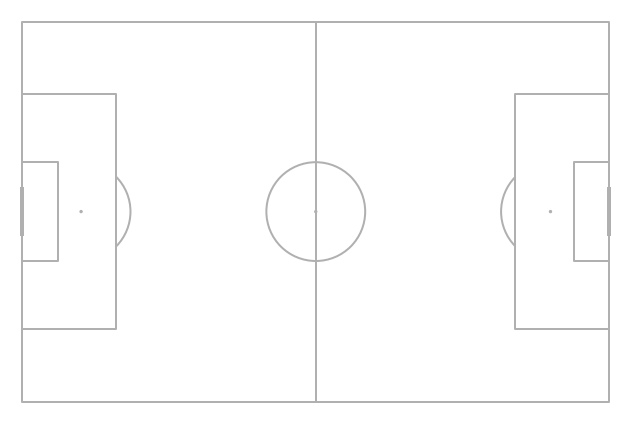

In [84]:
pitch = mplsoccer.Pitch(pitch_type='wyscout')
fig, ax = pitch.draw(figsize=(14,6))

In [85]:
shots_df['X'] = shots_df['X'].multiply(100)
shots_df['Y'] = shots_df['Y'].multiply(100)

In [86]:
crisPlotData = shots_df[shots_df['Player'] == 'Cristiano'].copy(deep=True)

In [92]:
messiPlotData = shots_df[shots_df['Player'] == 'Messi'].copy(deep=True)

### Plot HeatMaps

In [88]:
from scipy.ndimage import  gaussian_filter

Text(0.5, 1.0, 'Cristiano Shot HeatMap')

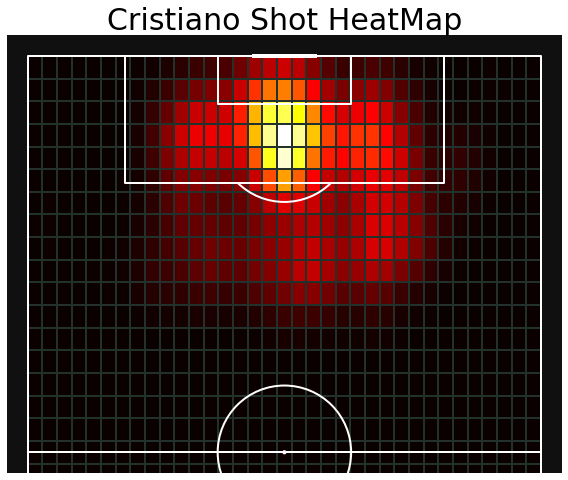

In [89]:
from mplsoccer.heatmap import bin_statistic
pitch = mplsoccer.VerticalPitch(pitch_type='wyscout',
                                line_color='white',
                                line_zorder=2,
                                pitch_color='#101010',
                                half=True)
fig, ax = pitch.draw(figsize=(8, 8))
bin_statistic = pitch.bin_statistic(crisPlotData['X'],
                                    crisPlotData['Y'],
                                    statistic='count',bins=(35,35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'],1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='hot', edgecolors='#22312b')
ax.set_title('Cristiano Shot HeatMap', fontsize=30)

Text(0.5, 1.0, 'Messi Shot HeatMap')

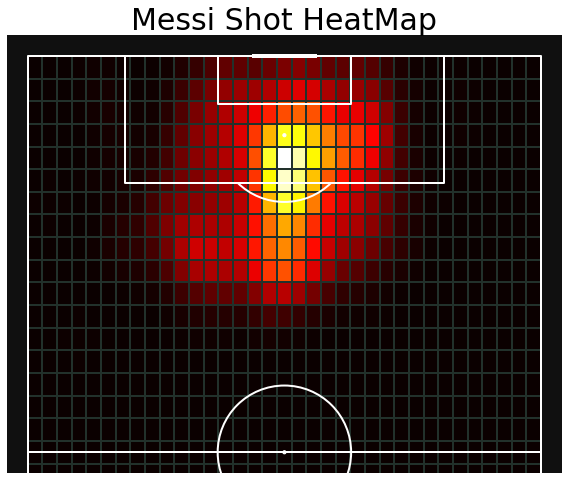

In [93]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='#101010',
                                half=True)
fig, ax = pitch.draw(figsize=(8, 8))
bin_statistic = pitch.bin_statistic(messiPlotData["X"],
                                    messiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='hot', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap", fontsize=30)

Text(0.5, 1.0, 'Messi Shot HeatMap')

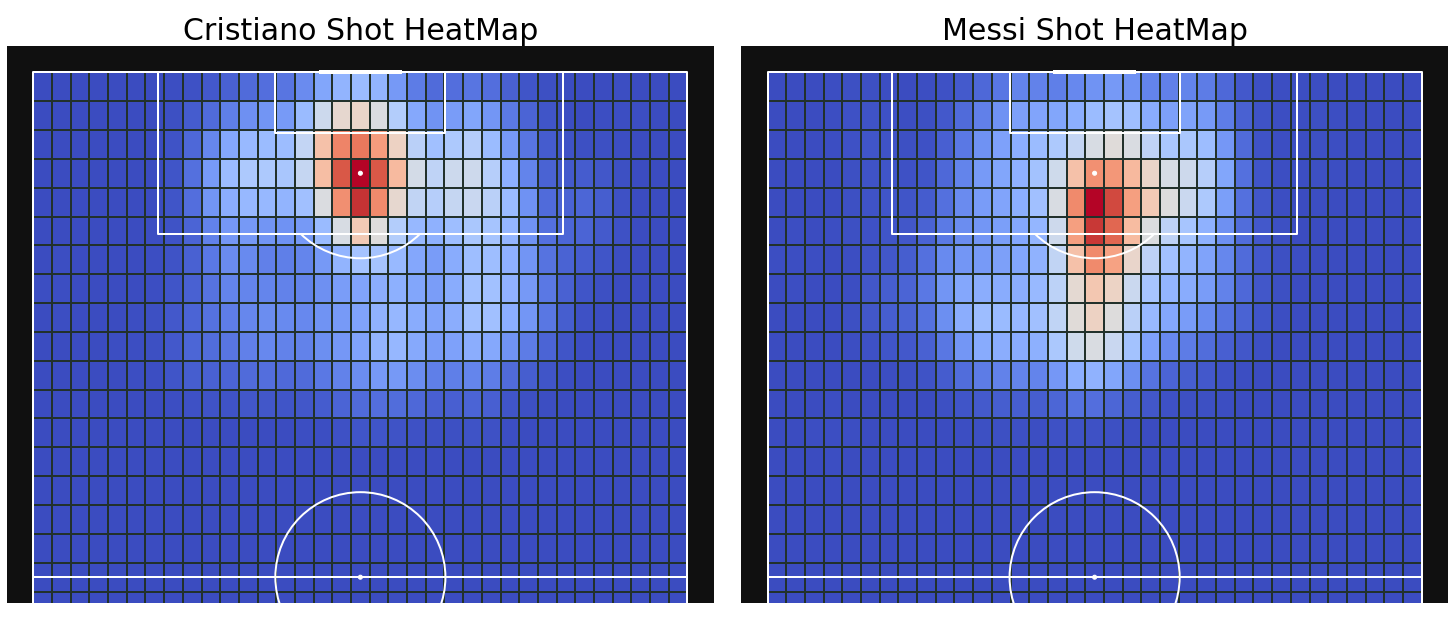

In [94]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='#101010',
                                half=True)
fig, axs = pitch.grid(nrows=1, ncols=2,
                     endnote_height=0.03, endnote_space=0,
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)

# Cristiano:
ax = axs["pitch"][0]
bin_statistic = pitch.bin_statistic(crisPlotData["X"],
                                    crisPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap", fontsize=30)

# Messi:
ax = axs["pitch"][1]
bin_statistic = pitch.bin_statistic(messiPlotData["X"],
                                    messiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap", fontsize=30)

In [95]:
shots_df.situation.unique()

array(['SetPiece', 'OpenPlay', 'Penalty', 'DirectFreekick', 'FromCorner'],
      dtype=object)

Text(0.5, 1.0, 'Messi Shot HeatMap')

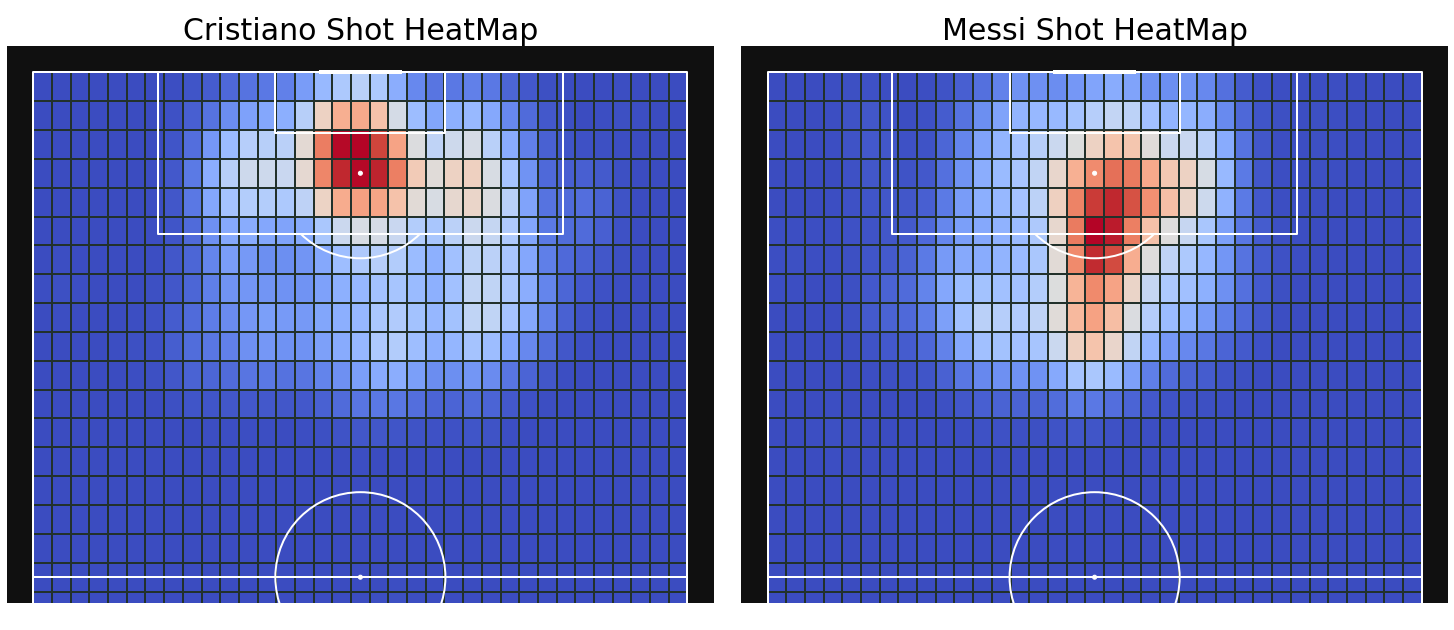

In [96]:
""" Shot Heatmaps (excluding penalties) """
wopCrisPlotData = crisPlotData.loc[crisPlotData["situation"] != "Penalty"].copy(deep=True)
wopMessiPlotData = messiPlotData.loc[messiPlotData["situation"] != "Penalty"].copy(deep=True)

pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='#101010',
                                half=True)
fig, axs = pitch.grid(nrows=1, ncols=2,
                     endnote_height=0.03, endnote_space=0,
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)

# Cristiano:
ax = axs["pitch"][0]
bin_statistic = pitch.bin_statistic(wopCrisPlotData["X"],
                                    wopCrisPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap", fontsize=30)

# Messi:
ax = axs["pitch"][1]
bin_statistic = pitch.bin_statistic(wopMessiPlotData["X"],
                                    wopMessiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap", fontsize=30)

Text(0.5, 1.0, 'Messi Shot HeatMap (w/o Pens)')

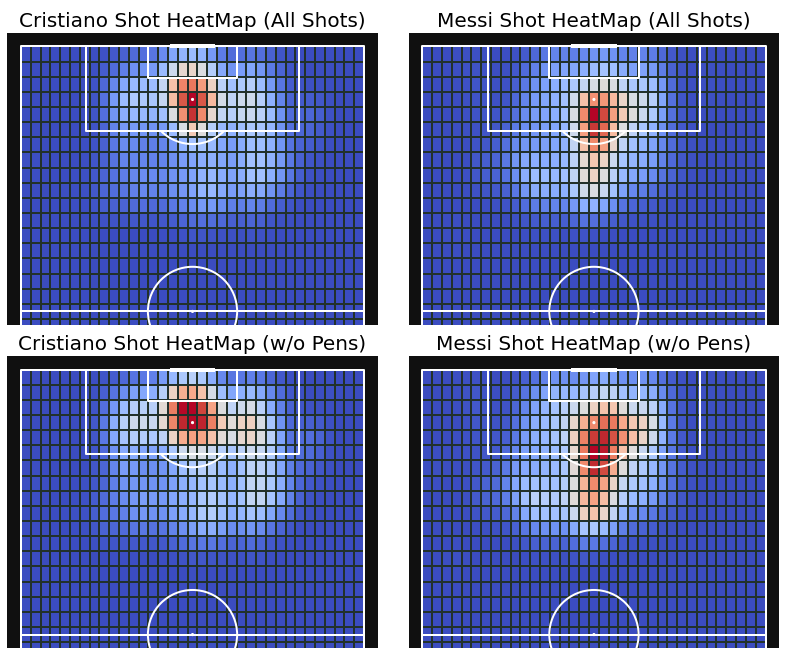

In [97]:
""" Shot Heatmaps (including and excluding penalties) """
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='#101010',
                                half=True)
fig, axs = pitch.grid(nrows=2, ncols=2,
                      endnote_height=0.01, endnote_space=0,
                      grid_width=0.95, left=0.02,
                      title_height=0.04, title_space=0,
                      axis=False,
                      grid_height=0.95)

# Cristiano with pen:
ax = axs["pitch"][0, 0]
bin_statistic = pitch.bin_statistic(crisPlotData["X"],
                                    crisPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap (All Shots)", fontsize=20)

# Messi with pen:
ax = axs["pitch"][0, 1]
bin_statistic = pitch.bin_statistic(messiPlotData["X"],
                                    messiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap (All Shots)", fontsize=20)

# Cristiano without pen:
ax = axs["pitch"][1, 0]
bin_statistic = pitch.bin_statistic(wopCrisPlotData["X"],
                                    wopCrisPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap (w/o Pens)", fontsize=20)

# Messi wo pen:
ax = axs["pitch"][1, 1]
bin_statistic = pitch.bin_statistic(wopMessiPlotData["X"],
                                    wopMessiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap (w/o Pens)", fontsize=20)

# Distance Analysis

## Per 90 Columns

In [99]:
season_wise_meta_df.columns

Index(['Player', 'position', 'games', 'goals', 'shots', 'time', 'xG',
       'assists', 'xA', 'key_passes', 'season', 'team', 'yellow', 'red', 'npg',
       'npxG', 'xGChain', 'xGBuildup', 'xGDiff', 'goal_contrib',
       'xgoal_contrib', 'shot_contrib', 'goals_p90', 'shots_p90', 'time_p90',
       'xG_p90', 'assists_p90', 'xA_p90', 'key_passes_p90', 'npg_p90',
       'npxG_p90', 'xGChain_p90', 'xGBuildup_p90', 'xGDiff_p90',
       'goal_contrib_p90', 'xgoal_contrib_p90', 'shot_contrib_p90'],
      dtype='object')

In [100]:
num_cols

['goals',
 'shots',
 'time',
 'xG',
 'assists',
 'xA',
 'key_passes',
 'npg',
 'npxG',
 'xGChain',
 'xGBuildup',
 'xGDiff',
 'goal_contrib',
 'xgoal_contrib',
 'shot_contrib']

In [101]:
for col in num_cols:
    season_wise_meta_df[col + "_p90"] = season_wise_meta_df[col].divide(season_wise_meta_df["time"]).multiply(90).round(2)

## Goals vs Shots (per season)

In [102]:
season_wise_meta_df.head()

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup,xGDiff,goal_contrib,xgoal_contrib,shot_contrib,goals_p90,shots_p90,time_p90,xG_p90,assists_p90,xA_p90,key_passes_p90,npg_p90,npxG_p90,xGChain_p90,xGBuildup_p90,xGDiff_p90,goal_contrib_p90,xgoal_contrib_p90,shot_contrib_p90
0,Cristiano,FW,3,3,17,270,3.44,0,0.04,2,2021,Manchester United,0,0,3,3.44,3.62,0.26,-0.44,3,3.5,19,1.00,5.67,90.0,1.15,0.00,0.01,0.67,1.00,1.15,1.21,0.09,-0.15,1.00,1.17,6.33
1,Cristiano,Sub,1,0,1,28,0.20,0,0.04,1,2021,Juventus,1,0,0,0.20,0.05,0.02,-0.20,0,0.2,2,0.00,3.21,90.0,0.64,0.00,0.13,3.21,0.00,0.64,0.16,0.06,-0.64,0.00,0.64,6.43
2,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92,-0.84,32,33.7,206,0.93,5.35,90.0,0.96,0.10,0.12,1.15,0.74,0.76,0.92,0.29,-0.03,1.03,1.08,6.60
3,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22,1.57,36,35.5,264,0.96,6.41,90.0,0.91,0.15,0.19,1.57,0.59,0.60,0.82,0.22,0.05,1.11,1.09,8.14
4,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18,-2.32,29,28.5,231,0.70,5.85,90.0,0.78,0.27,0.17,1.60,0.53,0.63,0.73,0.24,-0.08,0.97,0.95,7.72


In [103]:
fig = px.scatter(x="shots_p90", y="goals_p90", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", color="season", size="npg_p90",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots_p90"].min(), season_wise_meta_df["shots_p90"].max()],
                         y=[season_wise_meta_df["goals_p90"].mean(), season_wise_meta_df["goals_p90"].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots_p90"].mean(), season_wise_meta_df["shots_p90"].mean()],
                         y=[season_wise_meta_df["goals_p90"].min(), season_wise_meta_df["goals_p90"].max()],
                         name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=700, width=1200)
fig.update(layout_coloraxis_colorbar_len=0.5, layout_coloraxis_colorbar_y=0.4)
fig.show()

## Total Goals vs Total Expected Goals (per season)

In [104]:
fig = px.scatter(y="xG_p90", x="goals_p90", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df[["goals_p90", "xG_p90"]].min().min(),
                            season_wise_meta_df[["goals_p90", "xG_p90"]].max().max()],
                         y=[season_wise_meta_df[["goals_p90", "xG_p90"]].min().min(),
                            season_wise_meta_df[["goals_p90", "xG_p90"]].max().max()]))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=700, width=1000)

# The Final Comparison

In [105]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup,xGDiff,goal_contrib,xgoal_contrib,shot_contrib,goals_p90,shots_p90,time_p90,xG_p90,assists_p90,xA_p90,key_passes_p90,npg_p90,npxG_p90,xGChain_p90,xGBuildup_p90,xGDiff_p90,goal_contrib_p90,xgoal_contrib_p90,shot_contrib_p90
0,Cristiano,FW,3,3,17,270,3.44,0,0.04,2,2021,Manchester United,0,0,3,3.44,3.62,0.26,-0.44,3,3.5,19,1.00,5.67,90.0,1.15,0.00,0.01,0.67,1.00,1.15,1.21,0.09,-0.15,1.00,1.17,6.33
1,Cristiano,Sub,1,0,1,28,0.20,0,0.04,1,2021,Juventus,1,0,0,0.20,0.05,0.02,-0.20,0,0.2,2,0.00,3.21,90.0,0.64,0.00,0.13,3.21,0.00,0.64,0.16,0.06,-0.64,0.00,0.64,6.43
2,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92,-0.84,32,33.7,206,0.93,5.35,90.0,0.96,0.10,0.12,1.15,0.74,0.76,0.92,0.29,-0.03,1.03,1.08,6.60
3,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22,1.57,36,35.5,264,0.96,6.41,90.0,0.91,0.15,0.19,1.57,0.59,0.60,0.82,0.22,0.05,1.11,1.09,8.14
4,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18,-2.32,29,28.5,231,0.70,5.85,90.0,0.78,0.27,0.17,1.60,0.53,0.63,0.73,0.24,-0.08,0.97,0.95,7.72
5,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47,-1.00,31,32.5,223,1.02,6.95,90.0,1.05,0.20,0.22,1.56,0.90,0.94,1.24,0.37,-0.04,1.21,1.27,8.71
6,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66,-0.41,31,30.0,199,0.88,5.73,90.0,0.90,0.21,0.16,1.10,0.67,0.69,1.05,0.31,-0.01,1.10,1.06,7.03
7,Cristiano,AML,36,35,227,3186,35.59,11,8.61,51,2015,Real Madrid,3,0,29,28.90,40.82,9.86,-0.59,46,44.2,289,0.99,6.41,90.0,1.01,0.31,0.24,1.44,0.82,0.82,1.15,0.28,-0.02,1.30,1.25,8.16
8,Cristiano,FWL,35,48,225,3103,39.31,16,13.60,76,2014,Real Madrid,5,1,38,30.39,43.61,7.52,8.69,64,52.9,317,1.39,6.53,90.0,1.14,0.46,0.39,2.20,1.10,0.88,1.26,0.22,0.25,1.86,1.53,9.19
0,Messi,Sub,2,0,4,102,0.51,0,0.10,2,2021,Paris Saint Germain,0,0,0,0.51,0.58,0.06,-0.51,0,0.6,6,0.00,3.53,90.0,0.45,0.00,0.09,1.76,0.00,0.45,0.51,0.05,-0.45,0.00,0.53,5.29


In [106]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

In [107]:
radar_df

,Player,goals,shots,time,xG,assists,xA,key_passes,npg,npxG,xGChain,xGBuildup,xGDiff,goal_contrib,xgoal_contrib,shot_contrib
0,Cristiano,218,1360,19856,213.54,54,47.51,336,170,168.47,226.33,59.11,4.46,272,261.0,1750
1,Messi,231,1248,20626,192.87,97,105.99,598,203,163.86,299.33,119.36,38.13,328,298.7,1943


In [108]:
radar_df.columns

Index(['Player', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'npg', 'npxG', 'xGChain', 'xGBuildup', 'xGDiff', 'goal_contrib',
       'xgoal_contrib', 'shot_contrib'],
      dtype='object')

In [109]:
cols_for_radar = ['goals', 'shots', 'xG', 'xGDiff',
                  'assists', 'xA', 'key_passes',
                  'npg', 'npxG', 'goal_contrib', 'xgoal_contrib', 'shot_contrib']

## Radar Plot for Comparison Analysis

In [110]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True,
template="plotly_dark"
)
fig.show()

## Per90 Radar Plot

In [111]:
per_90_cols

['goals_p90',
 'shots_p90',
 'xG_p90',
 'assists_p90',
 'xA_p90',
 'key_passes_p90',
 'npg_p90',
 'npxG_p90',
 'xGChain_p90',
 'xGBuildup_p90',
 'xGDiff_p90',
 'goal_contrib_p90',
 'xgoal_contrib_p90',
 'shot_contrib_p90']

In [112]:
cols_for_radar = ['goals_p90',
 'shots_p90',
 'xG_p90',
 'xGDiff_p90',
 'assists_p90',
 'xA_p90',
 'key_passes_p90',
 'npg_p90',
 'npxG_p90',
 'goal_contrib_p90',
 'xgoal_contrib_p90',
 'shot_contrib_p90']

In [113]:
radar_df = season_wise_meta_df.groupby(["Player"])[cols_for_radar].sum().reset_index()

In [114]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True,
template="plotly_dark"
)
fig.show()

# Who Won?